### Import the required Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [4]:
pip install scikit-learn==1.1.3

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 930.1 kB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


### Load the Boston Housing DataSet from scikit-learn

In [16]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [17]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


### Load the data into pandas dataframe

In [18]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston['MEDV'] = boston_dataset.target

### Data preprocessing

In [20]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Visualization

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


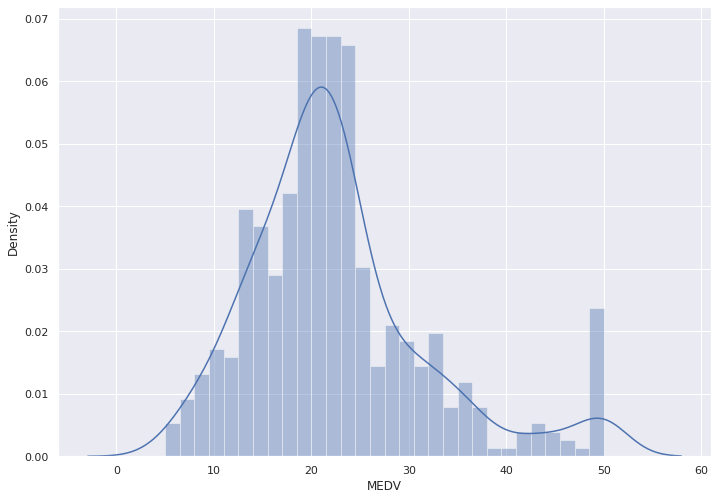

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Correlation matrix

<AxesSubplot:>

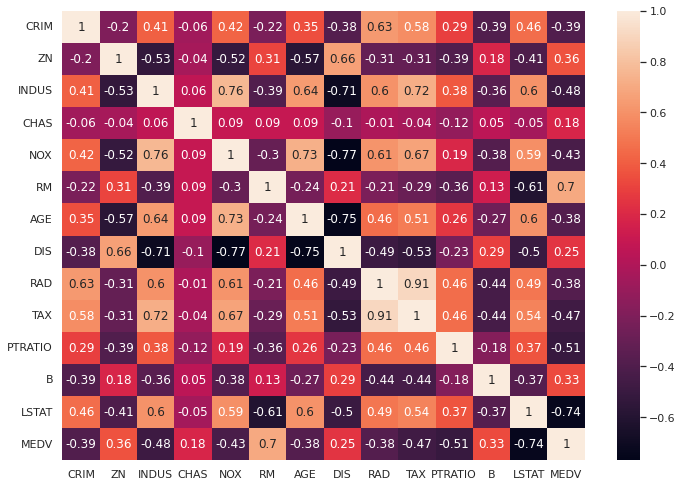

In [22]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Observation: MEDV is strongly correlated to LSTAT, RM

Text(0, 0.5, 'MEDV')

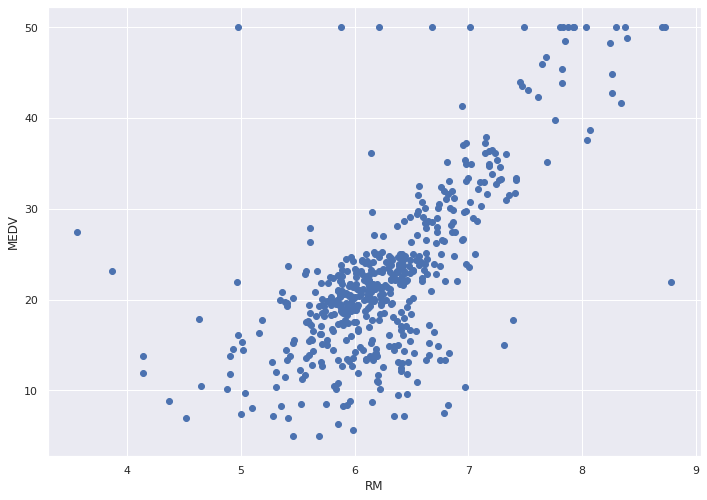

In [23]:
plt.scatter(x=boston['RM'],y=boston['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
#prices increase with increase in RM

Text(0, 0.5, 'MEDV')

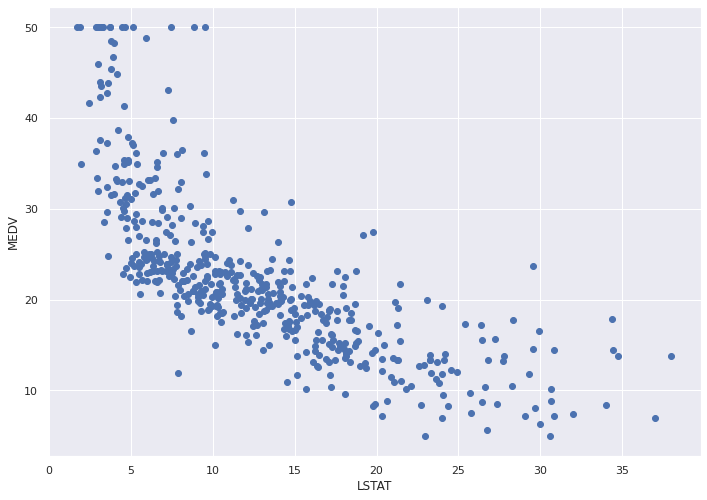

In [24]:
plt.scatter(x=boston['LSTAT'],y=boston['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
#prices decrease with increase in LSTAT

### Prepare the data for training

In [25]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [38]:
#normalizing the data
normalized_X=(X-X.min())/(X.max()-X.min())
normalized_Y=(Y-Y.min())/(Y.max()-Y.min())

### Spliting the data into training and testing sets

In [26]:
#80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [39]:
#80% for training and 20% for testing after normalization
from sklearn.model_selection import train_test_split

Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(normalized_X, normalized_Y, test_size = 0.2, random_state=10)
print(Xn_train.shape)
print(Xn_test.shape)
print(Yn_train.shape)
print(Yn_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training the model using sklearn LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [46]:
#after normalization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_lin_model = LinearRegression()
n_lin_model.fit(Xn_train, Yn_train)

LinearRegression()

In [28]:
#To retrieve the intercept:
print(lin_model.intercept_)

#For retrieving the slope:
print(lin_model.coef_)

3.1448715410668804
[-0.68480439  4.43045078]


In [41]:
#after normalization

#To retrieve the intercept:
print(n_lin_model.intercept_)

#For retrieving the slope:
print(n_lin_model.coef_)

0.28304433723086886
[-0.5514958   0.51383384]


### Model Evaluation

In [47]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse= mean_squared_error(Y_train, y_train_predict)
mae= mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse =(mean_squared_error(Y_test, y_test_predict))
mae= mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('MAE is {}'.format(mae))

The model performance for training set
--------------------------------------
RMSE is 5.2903630485515345
MSE is 27.98794118547948
MAE is 3.798063422689011


The model performance for testing set
--------------------------------------
RMSE is 6.434440411684905
MSE is 41.402023411523814
MAE is 4.582645892343416


In [49]:
#after normalization

# model evaluation for training set
n_y_train_predict = n_lin_model.predict(Xn_train)
n_rmse = (np.sqrt(mean_squared_error(Yn_train, n_y_train_predict)))
n_mse= (mean_squared_error(Yn_train, n_y_train_predict))
n_mae= mean_absolute_error(Yn_train, n_y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(n_rmse))
print('MSE is {}'.format(n_mse))
print('MAE is {}'.format(n_mae))
print("\n")

# model evaluation for testing set
n_y_test_predict = n_lin_model.predict(Xn_test)
n_rmse = (np.sqrt(mean_squared_error(Yn_test, n_y_test_predict)))
n_mse =(mean_squared_error(Yn_test, n_y_test_predict))
n_mae= mean_absolute_error(Yn_test, n_y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(n_rmse))
print('MSE is {}'.format(n_mse))
print('MSE is {}'.format(n_mae))


The model performance for training set
--------------------------------------
RMSE is 0.1175636233011452
MSE is 0.01382120552369357
MAE is 0.08440140939308914


The model performance for testing set
--------------------------------------
RMSE is 0.14298756470410903
MSE is 0.020445443660011768
MSE is 0.10183657538540926


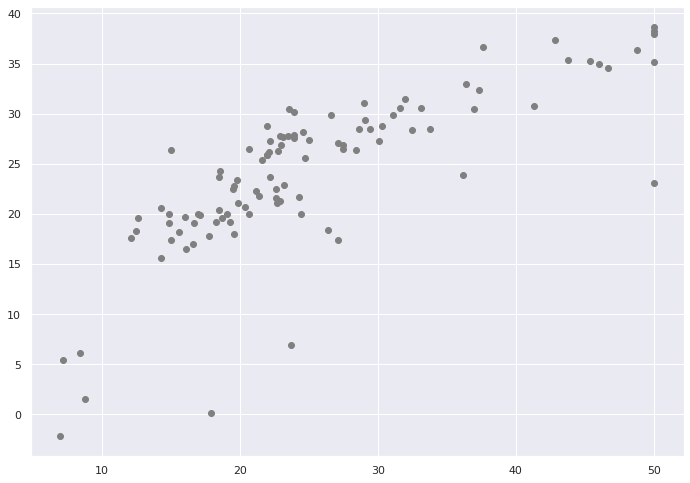

In [31]:
# plotting the y_test vs y_pred
plt.scatter(Y_test, y_test_predict, color='gray')
plt.show()
# ideally should have been a straight line

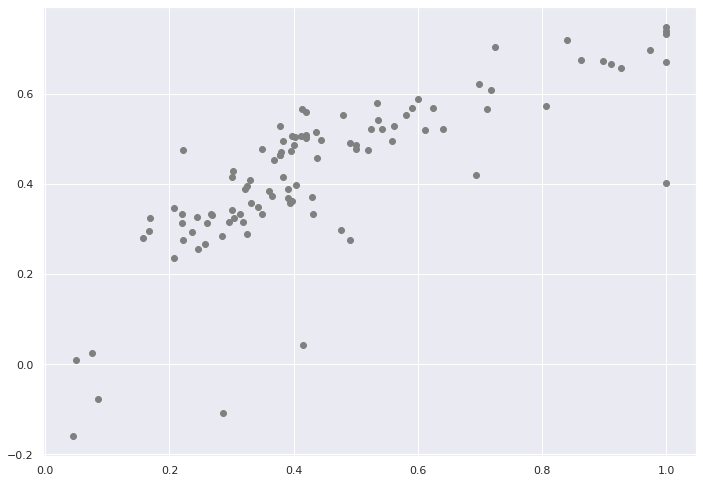

In [50]:
#after normalization

# plotting the y_test vs y_pred
plt.scatter(Yn_test, n_y_test_predict, color='gray')
plt.show()
# ideally should have been a straight line

### Gradient Descent

In [62]:
# Building the model for LSTAT vs MEDV
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
X=boston['LSTAT']

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.0232547046169485 1.685830018283485


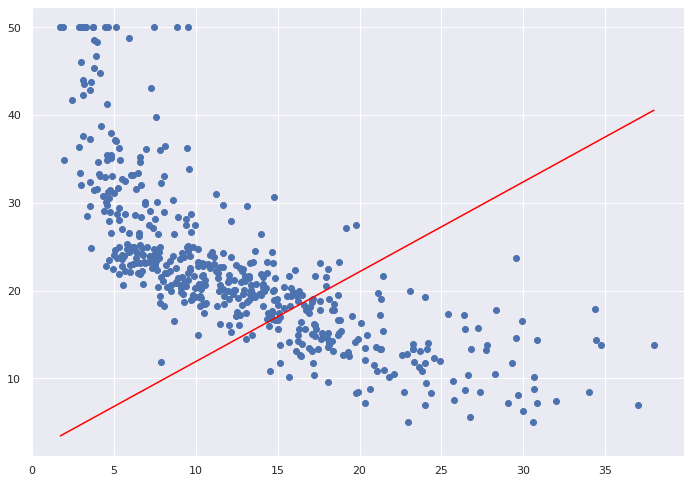

In [63]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()